<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center>🔎 About the Disease - Pulmonary Embolism 🔍 </center></h2>
    
If every breath is strained and painful, it could be a serious and potentially life-threatening condition. A pulmonary embolism (PE) is caused by an artery blockage in the lung. It is time consuming to confirm a PE and prone to overdiagnosis. Machine learning could help to more accurately identify PE cases, which would make management and treatment more effective for patients.

Currently, CT pulmonary angiography (CTPA), is the most common type of medical imaging to evaluate patients with suspected PE. These CT scans consist of hundreds of images that require detailed review to identify clots within the pulmonary arteries. As the use of imaging continues to grow, constraints of radiologists’ time may contribute to delayed diagnosis.

The Radiological Society of North America (RSNA®) has teamed up with the Society of Thoracic Radiology (STR) to help improve the use of machine learning in the diagnosis of PE.

In this competition, you’ll detect and classify PE cases. In particular, you'll use chest CTPA images (grouped together as studies) and your data science skills to enable more accurate identification of PE. If successful, you'll help reduce human delays and errors in detection and treatment.

With 60,000-100,000 PE deaths annually in the United States, it is among the most fatal cardiovascular diseases. Timely and accurate diagnosis will help these patients receive better care and may also improve outcomes.
    
<img src= "https://images.medicinenet.com/images/article/main_image/pulmonary-embolism-lungs.jpg">

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center>👀 Understanding the Data 👀 </center></h2>

We have the `training` and `test images`, as well as `train.csv` and `test.csv`. 

The images are grouped in directories by `study` and `series`. 

They are in `DICOM` format, and contain additional metadata that may be relevant to the competition. 

Each image has a unique identifier - `SOPInstanceUID`.

The location for each image is given by: `<StudyInstanceUID>/<SeriesInstanceUID>/<SOPInstanceUID>.dcm`.


<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center>Train.csv📄 Test.csv 📄 & Sample Submission.csv 📜 </center></h2>

* `train.csv` contains the three UIDs noted above, and a number of labels. Some are targets which require predictions, and some are informational, which will also be noted below in Data fields.

* `test.csv` contains only the three UIDs.

* `sample_submission.csv` contains rows for each UID+label combination that requires a prediction. Therefore it has a row for each image (for which we need to predict the existence of a pulmonary embolism within the image) and row for each study+label that requires a study-level prediction.

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 🖍 What are we predicting 🖍 </center></h2>
    
In this competition we are predicting a number of labels, at both the image and study level. 

Each `UID+label` combination requires a prediction. So, we need to make a prediction for each image & also need to make a prediction for each study+label combination at study-level.
<div class="alert alert-block alert-info"><b>Note # 1✍:</b> Some labels are Logically Mutually Exclusive,predictions must adhere to the expected label hierarchy defined in this diagram, and the host will verify that prospective winners have not made conflicting label predictions!</div>
  
  
  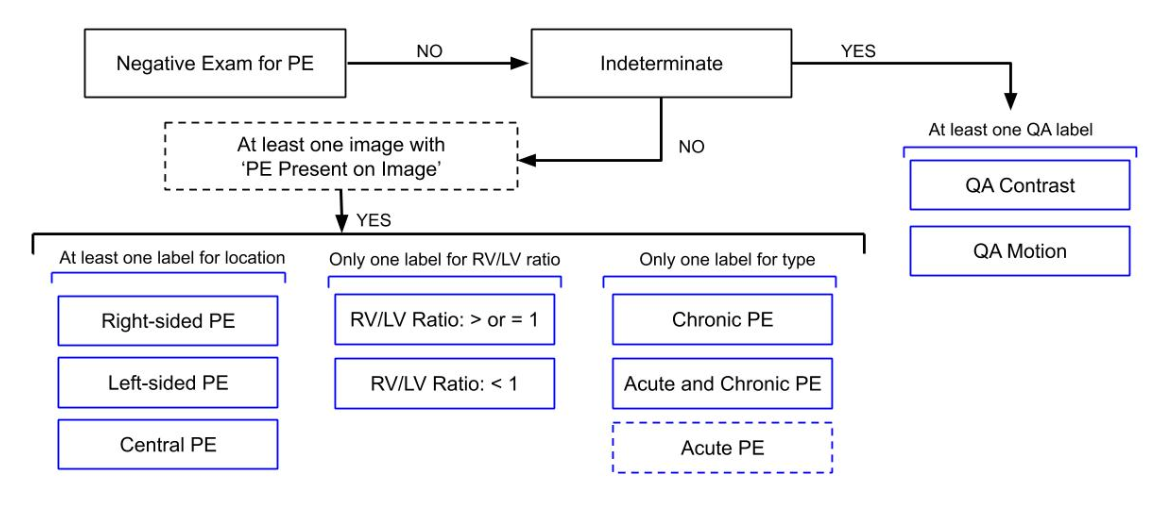 
  
  
Above image is a flowchart outlining the relationships between labels. 

<div class ="alert alert-block alert-info"> <b>Note # 2 ✍:</b> There are four labels in the training set that are purely informational and require no predictions. They are: 
    
* QA Contrast
* QA Motion
* True filling defect not PE
* Flow artifact </div>
 
Above labels are not scored, but are meant to be used as helpers. 

<div class="alert alert-block alert-info"><b>Note # 3 ✍:</b> Acute PE is not an explicit label, but is implied by the lack of Chronic PE or Acute and Chronic PE</div>

Predictions must adhere to the expected label hierarchy defined in this diagram, and the host will verify that prospective winners have not made conflicting label predictions, as detailed on the Prizes page.  

<div class="alert alert-block alert-info"> <b>Note # 4 ✍:</b> Submission kernels will NOT have access to train images, so we need to build our models elsewhere and incorporate them into our submissions</div>


<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 🥇🥈 Evaluation Metrics 🥉🏆  </center></h2>

Every `study / exam` has a row for each label that is scored. 

It is uniquely indicated by the `StudyInstanceUID`. 

Every image, further, has a row for the PE Present on Image label and is uniquely indicated by the SOPInstanceUID. 
    
Prediction file should have a number of rows equal to: (number of images) + (number of studies * number of scored labels).

### Metric🎯
The metric used in this competition is `weighted log loss`. 

It is weighted to account for the relative importance of some labels. 

There are `9 study-level labels` and `one image-level label`.

#### Exam-level weighted log loss
Let y_ij = 1 if label j was annotated to exam i and y_ij = 0, otherwise. Let p_ij be the predicted probability that y_ij = 1:
i = 1, 2, …, N for N exams in the test set
j = 1, 2, …, 9 labels

Let w_j signify the weight for label j.

The weights are as follows:

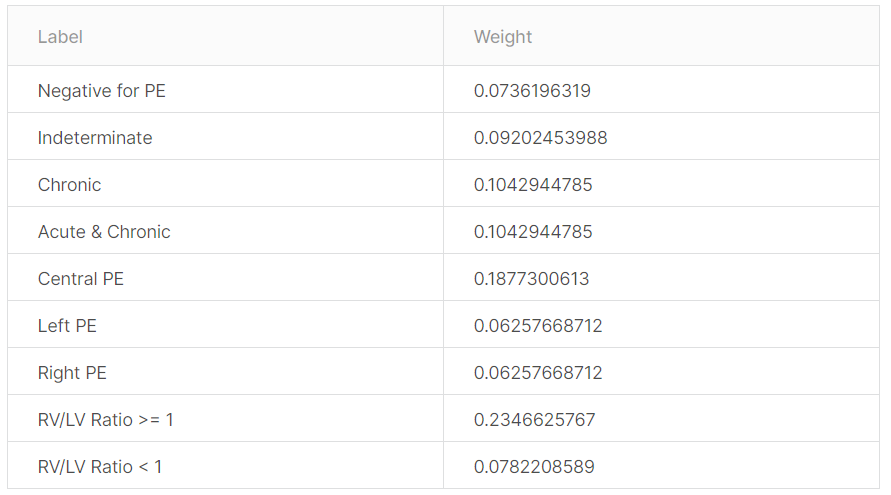

Kaggle uses a binary log loss equation for each label and then takes the mean of the log loss over all labels.

The binary weighted log loss function for label j on exam i is specified as:
Lij=−wj∗[yij∗log(pij)+(1−yij)∗log(1−pij)]


#### Image-level weighted log loss
Let y_ik = 1 if image k in exam i was annotated as ‘PE Present on Image’; otherwise, y_ik = 0.
Let p_ik be the predicted probability that y_ik = 1.
w = 0.07361963
i = 1, 2, …, N exams
k = 1, 2, …, n_i, where n_i is the number of images in exam i

Then, let m_i = sum_(k = 1 to n_i) y_ik be the number of positive images in exam i such that
q_i = m_i/n_i is the proportion of positive images in exam i

At the image level, we have a binary classification where the image is classified as PE Present on Image or not (image is negative for PE).

The image-level log loss is written as:


The total loss is the average of all image- and exam-level loss, divided by the sum of the weights.

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center>📚 Load Necessary Libraries 📚  </center></h2>
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os
import glob
import pydicom
from typing import Dict
import tqdm
#color
from colorama import Fore, Back, Style

import gc

# my favourite style :-)
plt.style.use('fivethirtyeight')

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 📃 Training & Test Datasets 📃</center></h2>
    

In [ ]:
train_dir = "/kaggle/input/rsna-str-pulmonary-embolism-detection/train/"
test_dir = "/kaggle/input/rsna-str-pulmonary-embolism-detection/test/"
train = pd.read_csv( "/kaggle/input/rsna-str-pulmonary-embolism-detection/train.csv")
test = pd.read_csv("/kaggle/input/rsna-str-pulmonary-embolism-detection/test.csv")
submission = pd.read_csv("/kaggle/input/rsna-str-pulmonary-embolism-detection/sample_submission.csv")

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> Add Path to the training dataset</center></h2>

In [ ]:
train['path'] = train_dir + train.StudyInstanceUID + "/" + train.SeriesInstanceUID + "/" + train.SOPInstanceUID + ".dcm"

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 📃 Let's take a look at the datasets 📃 </center></h2>

In [ ]:
print("Training dataset has {} rows & {} columns".format(train.shape[0],train.shape[1]))
print("Testing  dataset has {}  rows &  {} columns".format(test.shape[0],test.shape[1]))

In [ ]:
train.head()

In [ ]:
test.head()

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 👀 Null Values Check 👀</center></h2>

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.info()

<div class="alert alert-block alert-info"> <b>🔑 Observations:</b> 

*     No Null Values present in the dataset!
   
</div>

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 👁 No. of Unique values for each column 👁 </center></h2>

In [ ]:
for col in train.columns:
    print(Fore.YELLOW +"---------------------------------------------------", Style.RESET_ALL)
    print(Fore.BLUE + "Unique values for the column",col,":", Style.RESET_ALL)
    print(Fore.GREEN , train[col].nunique()), Style.RESET_ALL
    print(Fore.YELLOW +"---------------------------------------------------" + Style.RESET_ALL)    

<div class="alert alert-block alert-info"> <b>🔑 Observations:</b> 

*     Training dataset has 7279 unique Study level UIDs
 
*     Training dataset has 7279 unique Study level UIDs
 
*     Training dataset has 1790594 unique SOP level UIDs

*     Rest all columns are binary variables, which means they can have only 0 and 1 as possible values
   
</div>

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 📊 Data Distribution 📊</center></h2>

In [ ]:
for col in train.columns:
    print(Fore.GREEN +"---------------------------------------------------", Style.RESET_ALL)
    print(Fore.YELLOW + "Values Distribution for the column",col,":", Style.RESET_ALL)
    print(Fore.BLUE , train[col].value_counts()), Style.RESET_ALL
    print(Fore.GREEN +"---------------------------------------------------" + Style.RESET_ALL)    

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 📊 Exploratory Data Analysis 📊</center></h2>

In [ ]:
# function to plot countplot and piechart for different columns present in the dataset
def plot_graphs(cols_dict):    
    
    fig = plt.figure(figsize = (15,50))
    
    idx = 1
    
    for key in cols_dict:   
        value = cols_dict[key]         
        # countplots
        plt.subplot(6,2,idx)
        sns.countplot(train[key],palette="hls",alpha=0.9)              
        plt.xlabel(value)
        plt.ylabel("Frequency")
        plt.title(value)
        idx = idx + 1
    
    #plt.suptitle("Predictor Variables -  Distribution Graph")
    
    plt.show()

In [ ]:
cols = {"pe_present_on_image":"Pe Present On Image",
        "negative_exam_for_pe" :  "Negative Exam For Pe",
        "rv_lv_ratio_gte_1" : "Rv Lv Ratio Gte",
        "rv_lv_ratio_lt_1":"Rv Lv Ratio Lt",
        "leftsided_pe" : "Leftsided Pe", 
        "chronic_pe" : "Chronic Pe",
        "true_filling_defect_not_pe" : "True Filling Defect Not Pe" ,
        "rightsided_pe" : "Rightsided Pe",
        "acute_and_chronic_pe" : "Acute And Chronic Pe",
        "central_pe":"Central Pe",
        "indeterminate":"Indeterminate"}
plot_graphs(cols)

<div class="alert alert-block alert-info"> 
<b>🔑 Observations:  
    
Data set is highly imbalanced, as all the predictor variables have one of the values in 80s and 90s % and the other one is very low in %

</b></div>

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 💾 An Introduction to DICOM Files 💾 </center></h2>
    
Digital Imaging and Communications in Medicine (DICOM) is the standard for the communication and management of medical imaging information and related data.

These files may also include patient information to pair the image with the patient.

DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, and picture archiving and communication systems (PACS) from multiple manufacturers. 
    
It has been widely adopted by hospitals and is making inroads into smaller applications like dentists' and doctors' offices.

Multiple .dcm files represent different slices of a single CT scan. CT scans produce 3D volumes for each scan, those volumes consist of 2D slices and each slice is a .dcm file.

We have 2 directories here, train and test, both these directories have dicom images for different-different patients.

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 🎈 Explore training directory 🎈 </center></h2>

In [ ]:
print("There are {} StudyInstanceUID in the training dataset".format(len(os.listdir(train_dir))))

In [ ]:
p_sizes = []
for d in os.listdir(train_dir):    
    for sub in os.listdir(train_dir + d):   
        p_sizes.append(len(os.listdir(train_dir + d + "/" + sub)))
        print("StudyInstanceUID '{}' has {} SeriesInstanceUID".format(d, len(os.listdir(train_dir + d + "/" + sub))))
        print("StudyInstanceUID '{}' has {} instances of the Series {}".format(d,len(os.listdir(train_dir + d + "/" + sub)),sub))

In [ ]:
# lets visualize trainig data
fig = plt.figure(figsize = (12,8))
p = sns.color_palette()
plt.hist(p_sizes,color = "purple")
plt.ylabel('Number of StudyInstanceUID')
plt.xlabel('Count of Series UIDs')
plt.title('Histogram of DICOM count per StudyInstanceUID - Training Data')

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 🎈 Load a Random DICOM Image 🎈 </center></h2>

DICOM files can be read and processed easily with pydicom package. 
    
DICOM files allow to store metadata along with pixel data inside them. 
    
Reading a dicom file creates a pydicom.dataset.FileDataset object. 
FileDataset object wraps dict and contains DataElement instances.

In [ ]:
# lets read the first dicom image in training dataset
dcm = train.path.iloc[0]
print('Filename: {}'.format(dcm))
dcm = pydicom.read_file(dcm)

<div class="alert alert-block alert-info"> 
Now, we have read the image in a variable called dcm, we can simply "print" this variable to see the information related to the image!
 </div>


In [ ]:
print(dcm)

<div class="alert alert-block alert-info"> 

There are two things here that I think are significant, slice location and the 'Pixel Data'.

We can retrieve a image as a numpy array by calling dcm.pixel_array, and we can then replace the -2000s, which are essentially NAs, with 0s.
    
</div>

In [ ]:
# display the image read above
fig = plt.figure(figsize = (20,50))

img = dcm.pixel_array
img[img == -2000] = 0

plt.subplot(121)
plt.axis('off')
plt.imshow(img)

plt.subplot(122)
plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:brown; border:0; color:white' role="tab" aria-controls="home"><center> 💾 Let's Load some more Random DICOM Images 💾 </center></h2>

In [ ]:
# helper function
def dicom_to_image(filename):
    dcm = pydicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

In [ ]:
# lets display some 20 images at random
files = train.path.iloc[0:20]

f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

This gives us some idea with the sort of images we're dealing with.

#  Extracting DIOCOM files information in a dataframe 

In [ ]:
def extract_dicom_meta_data(filename: str) -> Dict:
    # Load image
    dcm = pydicom.read_file(filename)
    img=np.array(dcm.pixel_array).flatten()
    data = {
        'study_instance_uid': dcm.StudyInstanceUID,
        'series_instance_uid': dcm.SeriesInstanceUID,
        'series_number': dcm.SeriesNumber,
        'instance_number': dcm.InstanceNumber,
        'specific_character_set': dcm.SpecificCharacterSet,
        #'image_type': dcm.ImageType,
        'sop_class_uid': dcm.SOPClassUID,
        'sop_instance_uid': dcm.SOPInstanceUID,
        'modality': dcm.Modality,
        'slice_thickness': dcm.SliceThickness,
        'kvp': dcm.KVP,
        'gantry_detector': dcm.GantryDetectorTilt,
        'table_height': dcm.TableHeight,
        'rotation_direction': dcm.RotationDirection,
        'x_ray_tube_current': dcm.XRayTubeCurrent,
        'exposure': dcm.Exposure,
        'convolution_kernel' : dcm.ConvolutionKernel,
        'patient_position' : dcm.PatientPosition,
        #'image_position_patient' : dcm.ImagePositionPatient,
        #'image_orientation_patient': dcm.ImageOrientationPatient,
        'frame_of_reference_uid' : dcm.FrameOfReferenceUID,
        'samples_per_pixel' : dcm.SamplesPerPixel,
        'photometric_interpretation' : dcm.PhotometricInterpretation,
        'rows' : dcm.Rows,
        'columns' : dcm.Columns,
        'pixel_spacing' : dcm.PixelSpacing,
        'bits_allocated' : dcm.BitsAllocated,
        'bits_stored' : dcm.BitsStored,
        'high_bit' : dcm.HighBit,
        'pixel_representation': dcm.PixelRepresentation,
        'window_center': dcm.WindowCenter,
        'window_width': dcm.WindowWidth,
        'rescale_intercept': dcm.RescaleIntercept,
        'rescale_slope': dcm.RescaleSlope,
        'pixel_data': dcm.PixelData,
        'img_min': np.min(img),
        'img_max': np.max(img),
        'img_mean': np.mean(img),
        'img_std': np.std(img)
        }
    return data

In [ ]:
meta_data_df = extract_dicom_meta_data(train.path.iloc[0])

# Convert to a pd.DataFrame from dict
meta_data_df = pd.DataFrame.from_dict(meta_data_df)
meta_data_df.shape

# Baseline Model

In [ ]:
feats = list(train.columns[3:5])+list(train.columns[8:12])+list(train.columns[13:17])

In [ ]:
means = train[feats].mean().to_dict()
means

In [ ]:
submission['label'] = 0.2799
for feat in means.keys():
    submission.loc[submission.id.str.contains(feat, regex=False), 'label'] = means[feat]

In [ ]:
submission.to_csv('submission.csv', index = False)